In [56]:
!pip install tensorflow
!pip install matplotlib
!pip install seaborn


In [58]:
import tensorflow as tf
from keras.layers import TFSMLayer
import numpy as np

# Path to the SavedModel directory
model_path = r"E:\converted_savedmodel\model.savedmodel"
labels_path = r"E:\converted_savedmodel\labels.txt"

# Load the model as a TFSMLayer
model = TFSMLayer(model_path, call_endpoint='serving_default')

# Load labels from the text file
with open(labels_path, 'r') as file:
    labels = file.read().splitlines()

print(f"Labels: {labels}")  # Ensure the labels are loaded correctly


Labels: ['0 Psoriasis', '1 Eczema', '2 Melenoma', '3 Vitiligo']


In [86]:
from tensorflow.keras.preprocessing import image

# Path to your test image
test_image_path = r"E:\Scalp-Psoriasis.webp"

# Load and preprocess the image (resizing and normalization)
img = image.load_img(test_image_path, target_size=(224, 224))  # Ensure the target size matches model's input
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


In [88]:
# Perform inference
predictions = model(img_array)

# Extract the output tensor (use correct key if needed)
output_tensor = predictions['sequential_3']  # Adjust key if needed

# Print raw predictions to inspect the output
print(f"Raw output tensor: {output_tensor.numpy()}")

# Get the predicted class index
predicted_class = tf.argmax(output_tensor, axis=1).numpy()[0]
print(f"Predicted class index: {predicted_class}")

# Map the index to the class label
predicted_label = labels[predicted_class]
print(f"Predicted class label: {predicted_label}")


Raw output tensor: [[0.8694849  0.02340333 0.03334541 0.07376634]]
Predicted class index: 0
Predicted class label: 0 Psoriasis


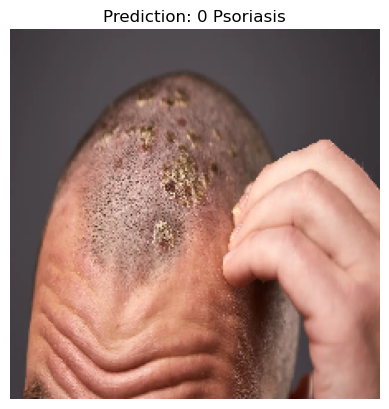

In [90]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Prediction: {predicted_label}")
plt.axis('off')
plt.show()
